In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import *

## Mini-Project: Advanced Statistical Analysis Of Apple Inc. Stock Data

## Initial Data Exploration

In [3]:
# Load the dataset using Pandas
df = pd.read_csv(r'/content/aapl__1_.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.574828,834741600
1,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.587542,797106800
2,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.802489,3349298400
3,2007-01-10,3.383929,3.492857,3.337500,3.464286,2.936606,2952880000
4,2007-01-11,3.426429,3.456429,3.396429,3.421429,2.900277,1440252800


In [4]:
# Check for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# understand data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

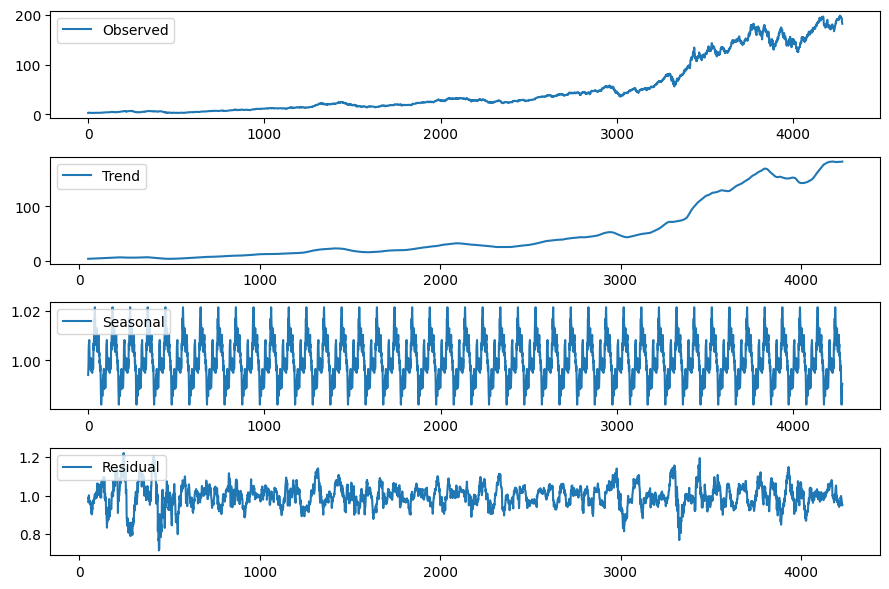

In [7]:
# Examine the time series properties of the data (e.g., frequency, trends).
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'], model='multiplicative', period=100)

# Plot the decomposed components
plt.figure(figsize=(9, 6))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.

Create a candlestick chart to depict high and low prices.

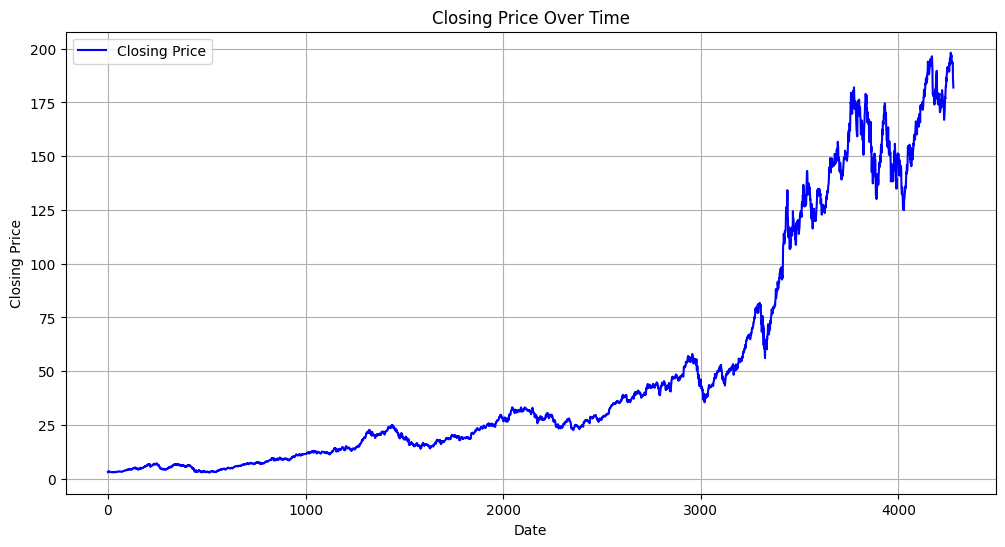

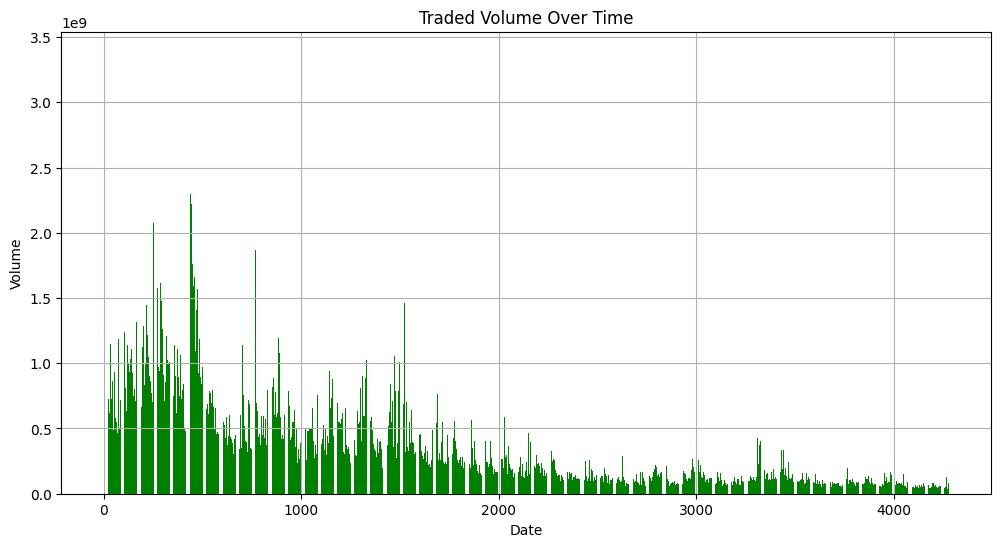

In [8]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot traded volume over time
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='green')
plt.title('Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [9]:
# Create a candlestick chart to depict high and low prices
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.

In [10]:
# Compute summary statistics
summary_stats = df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Open         High          Low        Close        Volume
count  4279.000000  4279.000000  4279.000000  4279.000000  4.279000e+03
mean     50.295449    50.840633    49.771759    50.329519  3.570181e+08
std      54.548956    55.157405    53.988843    54.602179  3.701461e+08
min       2.835357     2.928571     2.792857     2.792857  2.404830e+07
25%      12.241429    12.316429    12.094285    12.229643  1.027776e+08
50%      27.002501    27.232500    26.715000    27.000000  2.028872e+08
75%      56.988750    57.386250    56.543751    56.861250  4.830686e+08
max     198.020004   199.619995   197.000000   198.110001  3.372970e+09


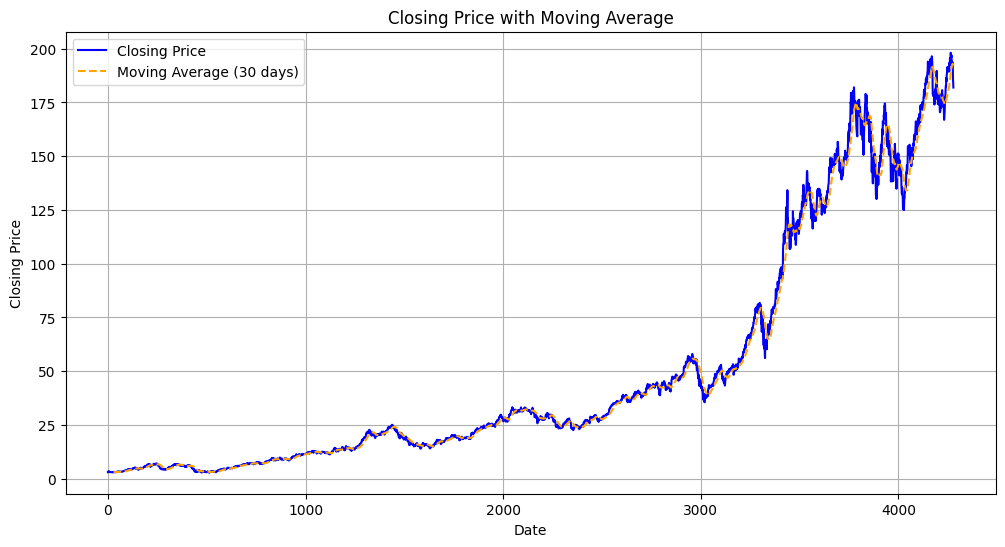

In [11]:
# Analyze closing prices with a moving average

# Calculate the moving average
df['MA_Close'] = df['Close'].rolling(window=30).mean()

# Plot closing prices with the moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA_Close'], label='Moving Average (30 days)', color='orange', linestyle='--')
plt.title(f'Closing Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.

In [22]:
# Extract year from the date
df['Year'] = df.Date.dt.year

In [23]:
# Execute a t-test to compare average closing prices across different years
years = df['Year'].unique()
closing_prices_by_year = [df[df['Year'] == year]['Close'] for year in years]
t_stat, p_value = ttest_ind(closing_prices_by_year[0], closing_prices_by_year[1])

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -4.342546810249765, P-Value: 1.7058755753507154e-05


In [24]:
# Examine daily returns’ distribution and test for normality using Shapiro-Wilk test
df['Daily_Return'] = df['Close'].pct_change().dropna()

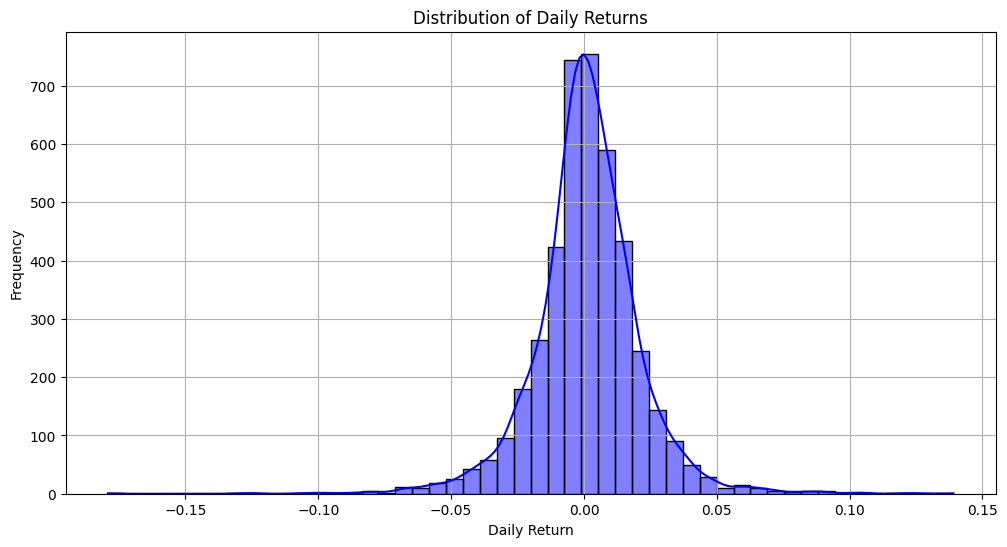

In [25]:
# Plot daily returns distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
# Test for normality using Shapiro-Wilk test
statistic, p_value_shapiro = shapiro(df['Daily_Return'])

print(f"Shapiro-Wilk Statistic: {statistic}, P-Value: {p_value_shapiro}")

Shapiro-Wilk Statistic: nan, P-Value: 1.0


## Advanced Statistical Techniques (Bonus)

Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.


In [40]:
# Calculate moving averages for closing prices
window_size_short = 10
window_size_long = 50

# Short-term moving average
ma_short = df['Close'].rolling(window=window_size_short, min_periods=1).mean()

# Long-term moving average
ma_long = df['Close'].rolling(window=window_size_long, min_periods=1).mean()

# Ensure the lengths match for correlation analysis
min_length = min(len(ma_short), len(ma_long), len(df['Volume']))
ma_short = ma_short[:min_length]
ma_long = ma_long[:min_length]
volume = df['Volume'][:min_length]

# Analyze correlations between moving averages and trading volume
correlation_short_volume = np.corrcoef(ma_short, volume)[0, 1]
correlation_long_volume = np.corrcoef(ma_long, volume)[0, 1]

print(f"Correlation between Short-term MA and Volume: {correlation_short_volume:.2f}")
print(f"Correlation between Long-term MA and Volume: {correlation_long_volume:.2f}")


Correlation between Short-term MA and Volume: -0.52
Correlation between Long-term MA and Volume: -0.52


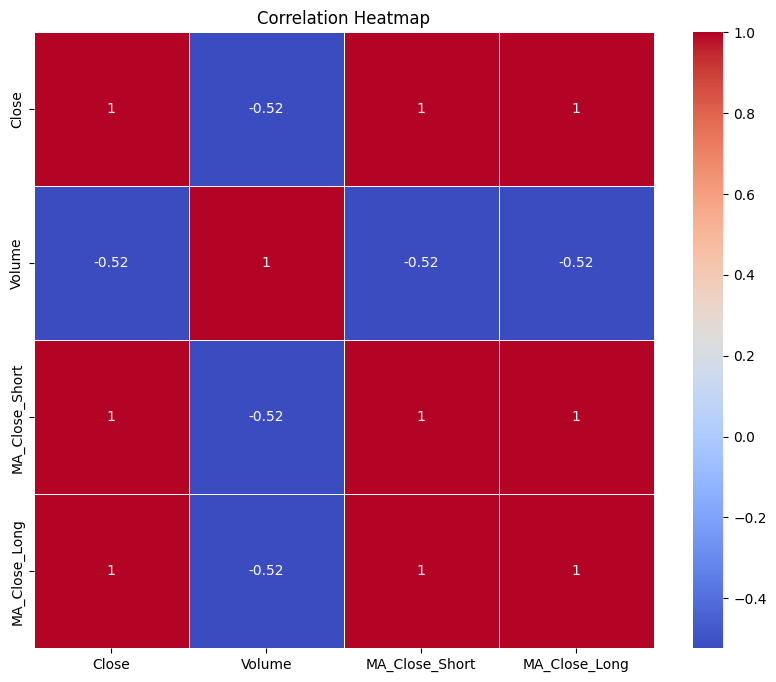

In [41]:

# Heatmap for correlation visualization
correlation_matrix = df[['Close', 'Volume']].join(ma_short.rename('MA_Close_Short')).join(ma_long.rename('MA_Close_Long')).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()